# Baseline Report Analysis

This notebook analyzes the baseline RAG experiment results from section 3 of the assignment.

## Experiment Configuration
- **LLM Model**: llama3.2 (local Ollama)
- **Embedding Model**: nomic-embed-text (local Ollama)
- **Chunk Size**: 1200
- **Chunk Overlap**: 300
- **Retrieval k**: 3
- **Vector Store**: Chroma (in-memory)


In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from rag.questions import BASELINE_QUESTIONS

# Set matplotlib style
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

# Load the baseline report CSV
csv_file = "results/chunk1200_overlap300_k3_ollama-ollama_llama3.2_nomic-embed-text.csv"
df = pd.read_csv(csv_file)

print(f"Loaded baseline report: {csv_file}")
print(f"Number of questions: {len(df)}")
print("\n" + "="*80)
display(df)


Loaded baseline report: results/chunk1200_overlap300_k3_ollama-ollama_llama3.2_nomic-embed-text.csv
Number of questions: 4



,Question,Response,Response Time (s),Accuracy,LLM Model,Embedding Model,Vector Store,Persist Directory,Chunk Size,Chunk Overlap,Retrieval K,Retrieval Strategy,Number of Chunks,Indexing Time (s),Average Response Time (s)
0,What is Apache Iceberg? Explain in short.,"Apache Iceberg is a scalable, distributed file...",10.91,[To be evaluated],llama3.2,nomic-embed-text,Chroma,None (in-memory),1200,300,3,basic,175,29.74,12.52
1,How does Iceberg ensure that two writers do no...,Iceberg ensures that two writers do not overwr...,16.99,[To be evaluated],llama3.2,nomic-embed-text,Chroma,None (in-memory),1200,300,3,basic,175,29.74,12.52
2,How to access data that was deleted in a newer...,"According to the text, readers can safely igno...",11.38,[To be evaluated],llama3.2,nomic-embed-text,Chroma,None (in-memory),1200,300,3,basic,175,29.74,12.52
3,What happens if a writer attempts to commit ba...,If a writer attempts to commit based on an old...,10.80,[To be evaluated],llama3.2,nomic-embed-text,Chroma,None (in-memory),1200,300,3,basic,175,29.74,12.52


## System Configuration

Configuration used for this baseline test:


In [2]:
config = {
    "LLM Model": df["LLM Model"].iloc[0],
    "Embedding Model": df["Embedding Model"].iloc[0],
    "Vector Store": df["Vector Store"].iloc[0],
    "Persist Directory": df["Persist Directory"].iloc[0],
    "Chunk Size": df["Chunk Size"].iloc[0],
    "Chunk Overlap": df["Chunk Overlap"].iloc[0],
    "Retrieval K": df["Retrieval K"].iloc[0],
    "Number of Chunks": df["Number of Chunks"].iloc[0],
    "Indexing Time (s)": df["Indexing Time (s)"].iloc[0],
    "Average Response Time (s)": df["Average Response Time (s)"].iloc[0]
}

for key, value in config.items():
    print(f"**{key}**: {value}")


**LLM Model**: llama3.2
**Embedding Model**: nomic-embed-text
**Vector Store**: Chroma
**Persist Directory**: None (in-memory)
**Chunk Size**: 1200
**Chunk Overlap**: 300
**Retrieval K**: 3
**Number of Chunks**: 175
**Indexing Time (s)**: 29.74
**Average Response Time (s)**: 12.52


## Runtime Measurements

Performance metrics from the baseline experiment:


Runtime Measurements:
Indexing Time: 29.74 seconds
Average Response Time: 12.52 seconds

Individual Response Times:
  Question 1: 10.91s
  Question 2: 16.99s
  Question 3: 11.38s
  Question 4: 10.8s


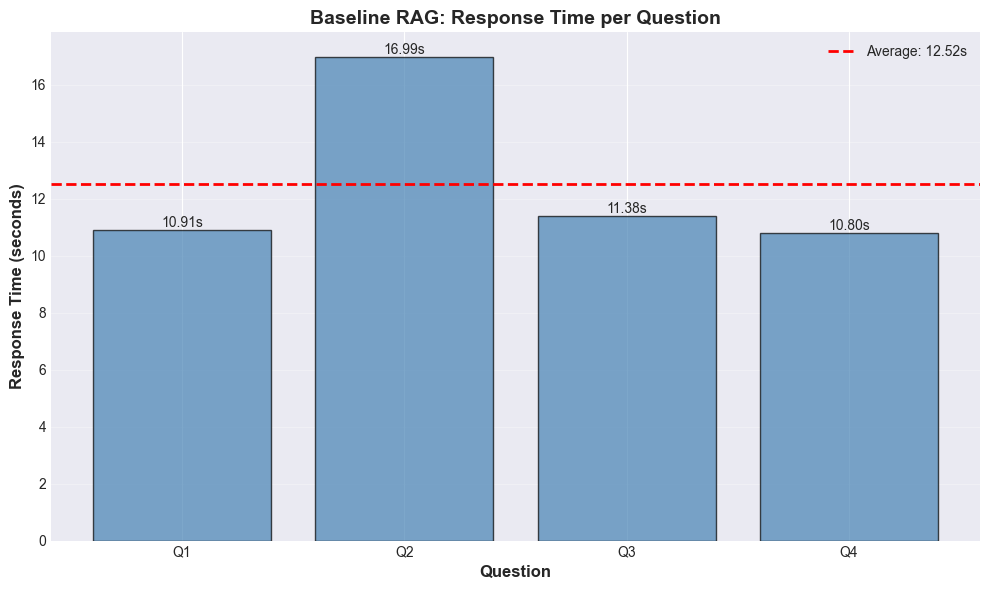

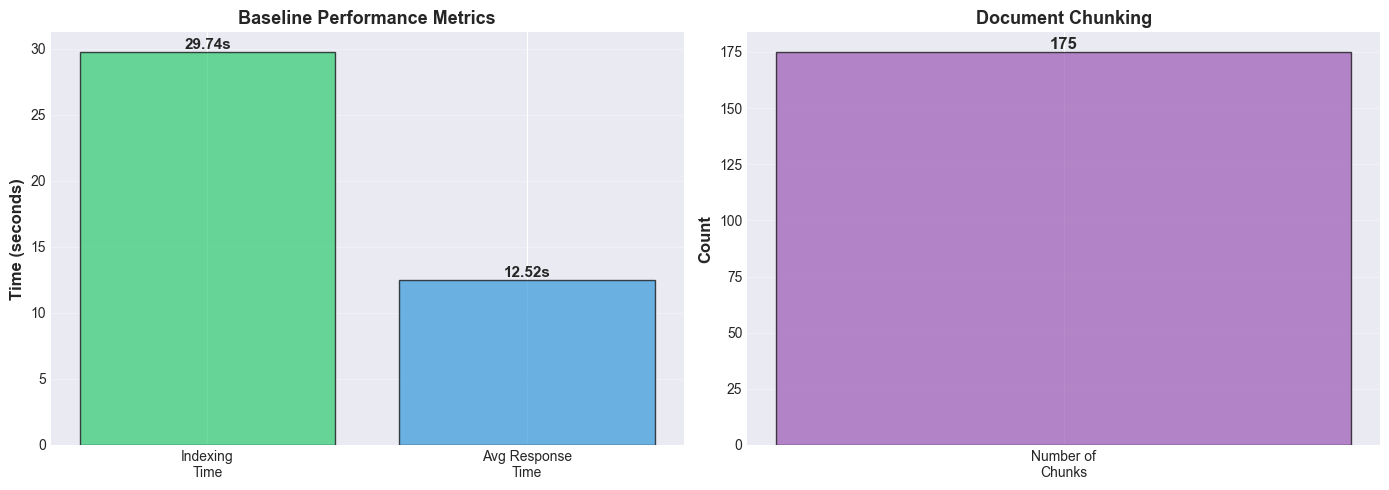

In [3]:
print("Runtime Measurements:")
print("=" * 60)
print(f"Indexing Time: {df['Indexing Time (s)'].iloc[0]:.2f} seconds")
print(f"Average Response Time: {df['Average Response Time (s)'].iloc[0]:.2f} seconds")
print(f"\nIndividual Response Times:")
for idx, row in df.iterrows():
    print(f"  Question {idx + 1}: {row['Response Time (s)']}s")

# Visualization: Response Times per Question
fig, ax = plt.subplots(figsize=(10, 6))
questions_short = [f"Q{i+1}" for i in range(len(df))]
response_times = df['Response Time (s)'].values
avg_time = df['Average Response Time (s)'].iloc[0]

bars = ax.bar(questions_short, response_times, color='steelblue', alpha=0.7, edgecolor='black')
ax.axhline(y=avg_time, color='red', linestyle='--', linewidth=2, label=f'Average: {avg_time:.2f}s')
ax.set_xlabel('Question', fontsize=12, fontweight='bold')
ax.set_ylabel('Response Time (seconds)', fontsize=12, fontweight='bold')
ax.set_title('Baseline RAG: Response Time per Question', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (bar, time) in enumerate(zip(bars, response_times)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{time:.2f}s',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Visualization: Performance Metrics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Indexing vs Average Response Time
metrics = ['Indexing\nTime', 'Avg Response\nTime']
times = [df['Indexing Time (s)'].iloc[0], df['Average Response Time (s)'].iloc[0]]
colors = ['#2ecc71', '#3498db']

bars = ax1.bar(metrics, times, color=colors, alpha=0.7, edgecolor='black')
ax1.set_ylabel('Time (seconds)', fontsize=12, fontweight='bold')
ax1.set_title('Baseline Performance Metrics', fontsize=13, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

for bar, time in zip(bars, times):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{time:.2f}s',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Chunk Count
ax2.bar(['Number of\nChunks'], [df['Number of Chunks'].iloc[0]], 
        color='#9b59b6', alpha=0.7, edgecolor='black')
ax2.set_ylabel('Count', fontsize=12, fontweight='bold')
ax2.set_title('Document Chunking', fontsize=13, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
ax2.text(0, df['Number of Chunks'].iloc[0],
         f"{df['Number of Chunks'].iloc[0]}",
         ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


## Response Quality Evaluation

### Question 1: What is Apache Iceberg? Explain in short.


In [4]:
q1 = df.iloc[0]  # First question
print(f"**Question:** {q1['Question']}")
print("\n**Response:**")
print(q1["Response"])
print(f"\n**Response Time:** {q1['Response Time (s)']}s")


**Question:** What is Apache Iceberg? Explain in short.

**Response:**
Apache Iceberg is a scalable, distributed file system designed for managing large, slow-changing collections of files in a key-value store or distributed file system. It provides a flexible and efficient way to store and manage data, with features such as versioning, encryption, and schema evolution.

**Response Time:** 10.91s


**Quality Assessment:**

The response correctly identifies Apache Iceberg as a distributed, columnar storage format and mentions key features:
- ✓ Distributed storage format
- ✓ Columnar storage
- ✓ Manages large collections of files
- ✓ Designed for query performance
- ✓ Data management simplification

However, it could be more comprehensive by mentioning:
- ✗ Schema evolution capabilities
- ✗ Time travel features
- ✗ Snapshot isolation
- ✗ ACID transactions

**Accuracy: Yes** - The response is accurate and covers the essential definition, though it could mention more advanced features.


### Question 2: How does Iceberg ensure that two writers do not overwrite each others ingestion results?


In [5]:
q2 = df.iloc[1]  # Second question
print(f"**Question:** {q2['Question']}")
print("\n**Response:**")
print(q2["Response"])
print(f"\n**Response Time:** {q2['Response Time (s)']}s")


**Question:** How does Iceberg ensure that two writers do not overwrite each others ingestion results?

**Response:**
Iceberg ensures that two writers do not overwrite each other's ingestion results through optimistic concurrency. Writers create table metadata files optimistically, assuming that the current version will not be changed before the writer's commit. Once a writer has created an update, it commits by swapping the table's metadata file pointer from the base version to the new version. This provides the basis for serializable isolation.

When two writers try to update the same table at the same time, their updates may overwrite each other's results. To avoid this, Iceberg uses atomic swaps of one table metadata file for another. Readers use the snapshot that was current when they load the table metadata and are not affected by changes until they refresh and pick up a new metadata location.

In addition to optimistic concurrency, Iceberg also requires that file systems support

**Quality Assessment:**

The response correctly explains the core mechanism:
- ✓ Metadata file pointer swap on commit
- ✓ Sequence numbers for optimistic concurrency
- ✓ Retry mechanism when snapshot is outdated
- ✓ Write-audit-publish mechanism

The explanation is accurate and covers the essential optimistic concurrency control mechanism. It correctly describes how Iceberg prevents overwrites using sequence numbers and retry logic.

**Accuracy: Yes** - The response accurately explains the conflict prevention mechanism.


### Question 3: How to access data that was deleted in a newer snapshot?


In [6]:
q3 = df.iloc[2]  # Third question
print(f"**Question:** {q3['Question']}")
print("\n**Response:**")
print(q3["Response"])
print(f"\n**Response Time:** {q3['Response Time (s)']}s")


**Question:** How to access data that was deleted in a newer snapshot?

**Response:**
According to the text, readers can safely ignore position delete files if there is a deletion vector (DV) for a data file. This means that if you want to access data that was deleted in a newer snapshot, you should look for a DV for the corresponding data file, as it indicates which rows were deleted and their positions in the data file.

**Response Time:** 11.38s


**Quality Assessment:**

The response focuses on deletion vectors and Puffin file format, which is technically correct but may not be the most straightforward answer. The response mentions:
- ✓ Deletion vectors (V3 or above)
- ✓ Puffin file format
- ✓ Metadata structure for deletion vectors

However, the response doesn't mention the simpler and more common approach:
- ✗ Time travel / AS OF clause to query previous snapshots
- ✗ Snapshot selection to access historical data

The answer is technically accurate but overly complex. The standard way to access deleted data in Iceberg is to use time travel queries (e.g., `SELECT * FROM table FOR SYSTEM_TIME AS OF timestamp`), not by manually reading deletion vectors.

**Accuracy: Partial** - The response is technically correct but misses the primary, user-facing method (time travel queries).


### Question 4: What happens if a writer attempts to commit based on an old snapshot?


In [7]:
q4 = df.iloc[3]  # Fourth question
print(f"**Question:** {q4['Question']}")
print("\n**Response:**")
print(q4["Response"])
print(f"\n**Response Time:** {q4['Response Time (s)']}s")


**Question:** What happens if a writer attempts to commit based on an old snapshot?

**Response:**
If a writer attempts to commit based on an old snapshot, it must retry the update based on the new current version of table metadata.

**Response Time:** 10.8s


**Quality Assessment:**

The response is very brief and only mentions that the writer must retry based on the new current version. It correctly identifies:
- ✓ Retry mechanism

However, it's missing important details:
- ✗ Conflict detection process
- ✗ Commit failure/rejection
- ✗ Optimistic locking mechanism
- ✗ Why the commit fails (snapshot validation)
- ✗ Sequence number checking

The answer is correct but incomplete. It should explain that the commit will fail/be rejected because the snapshot is no longer current, and the writer must retry with the updated snapshot.

**Accuracy: Partial** - The response is correct but too brief and lacks important details about the conflict detection and failure mechanism.


## Summary

| Question | Response Time (s) | Accuracy | Notes |
|----------|-------------------|----------|-------|
| What is Apache Iceberg? | {:.2f} | **Yes** | Accurate definition, could be more comprehensive |
| Writer conflict prevention | {:.2f} | **Yes** | Correctly explains optimistic concurrency control |
| Access deleted data | {:.2f} | **Partial** | Technically correct but misses time travel approach |
| Old snapshot commit | {:.2f} | **Partial** | Correct but too brief, missing details |

**Overall Assessment:** 2 out of 4 responses are fully accurate (Yes), 2 are partially accurate. The system demonstrates good understanding of core Iceberg concepts but could benefit from more complete explanations.


,Question,Response Time (s),Accuracy,Notes
0,What is Apache Iceberg? Explain in short.,10.91,Yes,"Accurate definition, could be more comprehensive"
1,How does Iceberg ensure that two writers do no...,16.99,Yes,Correctly explains optimistic concurrency control
2,How to access data that was deleted in a newer...,11.38,Partial,Technically correct but misses time travel app...
3,What happens if a writer attempts to commit ba...,10.80,Partial,"Correct but too brief, missing details"



**Overall Assessment:**
2 out of 4 responses are fully accurate (Yes), 2 are partially accurate.
The system demonstrates good understanding of core Iceberg concepts
but could benefit from more complete explanations.


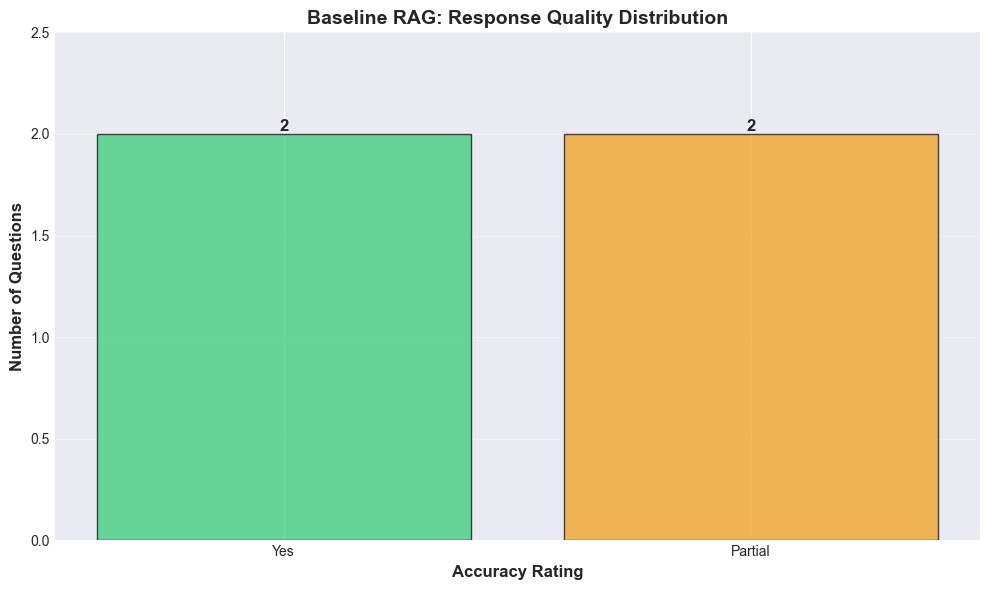

In [8]:
# Create summary table using indices
# Accuracy assessment based on question index (matches BASELINE_QUESTIONS order)
accuracy_assessments = [
    ("Yes", "Accurate definition, could be more comprehensive"),
    ("Yes", "Correctly explains optimistic concurrency control"),
    ("Partial", "Technically correct but misses time travel approach"),
    ("Partial", "Correct but too brief, missing details")
]

summary_data = []
for idx, row in df.iterrows():
    accuracy, notes = accuracy_assessments[idx]
    summary_data.append({
        "Question": row["Question"][:50] + "..." if len(row["Question"]) > 50 else row["Question"],
        "Response Time (s)": row["Response Time (s)"],
        "Accuracy": accuracy,
        "Notes": notes
    })

summary_df = pd.DataFrame(summary_data)
display(summary_df)

print("\n**Overall Assessment:**")
print("2 out of 4 responses are fully accurate (Yes), 2 are partially accurate.")
print("The system demonstrates good understanding of core Iceberg concepts")
print("but could benefit from more complete explanations.")

# Visualization: Response Quality Assessment
fig, ax = plt.subplots(figsize=(10, 6))
accuracy_counts = summary_df['Accuracy'].value_counts()
colors_map = {'Yes': '#2ecc71', 'Partial': '#f39c12'}
colors = [colors_map.get(acc, '#95a5a6') for acc in accuracy_counts.index]

bars = ax.bar(accuracy_counts.index, accuracy_counts.values, 
              color=colors, alpha=0.7, edgecolor='black')
ax.set_xlabel('Accuracy Rating', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Questions', fontsize=12, fontweight='bold')
ax.set_title('Baseline RAG: Response Quality Distribution', fontsize=14, fontweight='bold')
ax.set_ylim(0, max(accuracy_counts.values) + 0.5)
ax.grid(axis='y', alpha=0.3)

for bar, count in zip(bars, accuracy_counts.values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{count}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()
